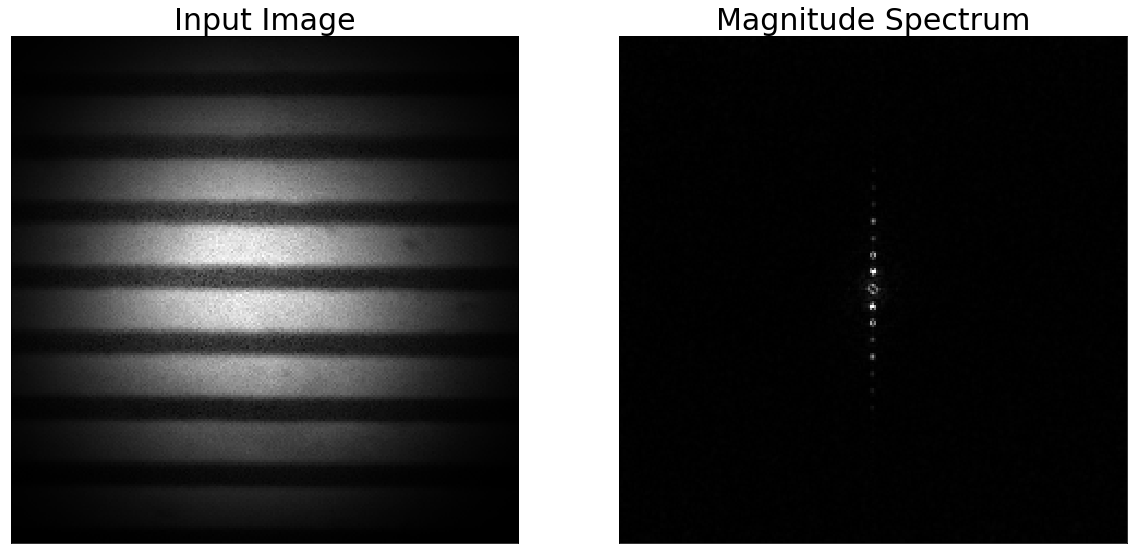

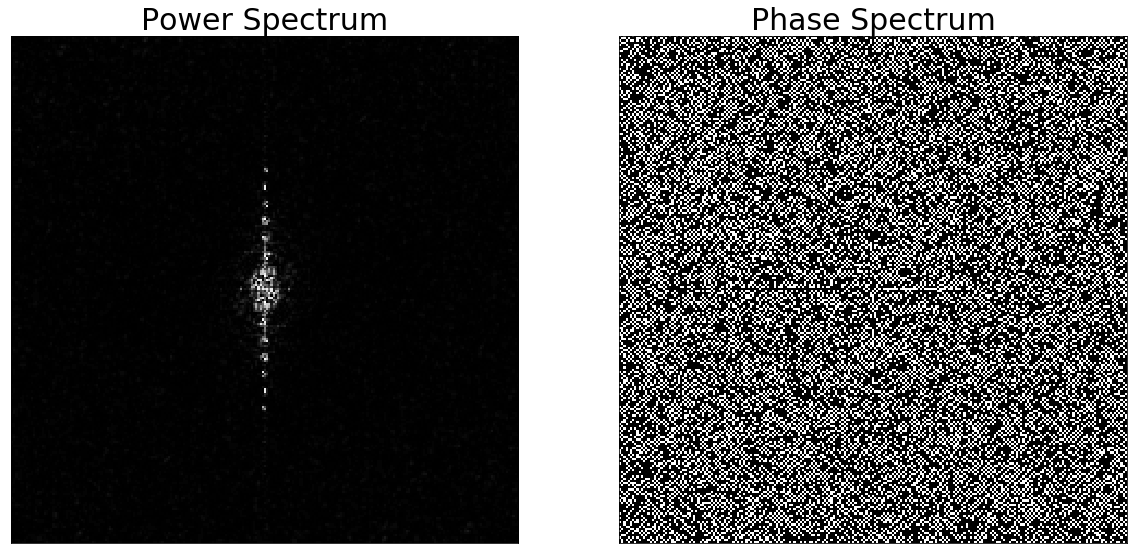

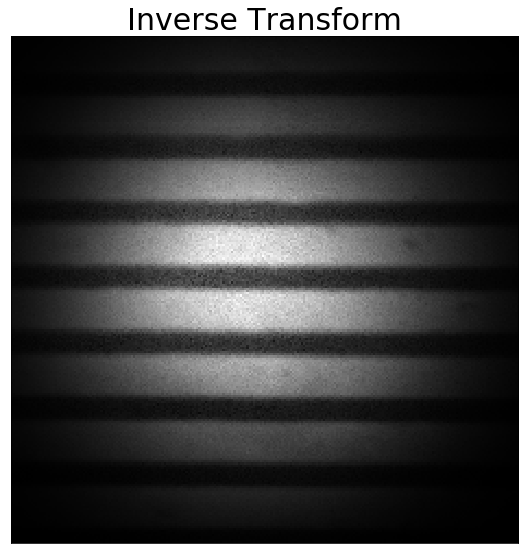

In [2]:
from PIL import Image, ImageOps, ImageDraw
from scipy import fftpack, ndimage
import numpy as np
from imageio import imread
from matplotlib import pyplot as plt

Gfiltstrength = 70


im = Image.open('EQ1580gray.png')
bigsize = (im.size[0] * 1, im.size[1] * 1) 
mask = Image.new('L', bigsize, 255) #change 3rd argument to 0 to perform circular crop
draw = ImageDraw.Draw(mask) 
draw.ellipse((0, 0) + bigsize, fill=255)
mask = mask.resize(im.size, Image.ANTIALIAS)
im.putalpha(mask)
imgin = ImageOps.fit(im, mask.size, centering=(0.5, 0.5))
imgin.putalpha(mask)

background = Image.new('L', im.size, color=0)
background.paste(im, im)
imgarr = np.asarray(background)

# Build and apply a Gaussian filter.
ncols, nrows = (im.size[0], im.size[1])
sigmax, sigmay = Gfiltstrength, Gfiltstrength
cy, cx = nrows/2, ncols/2
x = np.linspace(0, nrows, nrows)
y = np.linspace(0, ncols, ncols)
X, Y = np.meshgrid(x, y)
gmask = np.exp(-(((X-cx)/sigmax)**2 + ((Y-cy)/sigmay)**2))


multp = imgarr * gmask
# plt.imshow(np.abs(multp), cmap='gray')
# plt.show()

f = np.fft.fft2(multp, norm='ortho')
# f[0,0] = 0 #remove DC
fshift = np.fft.fftshift(f)
    
imagep = np.fft.ifft2(fshift)


power = (np.abs(fshift).astype(np.uint8))**2
magnitude_spectrum = np.abs(fshift).astype(np.uint8)
phase = np.angle(fshift).astype(np.uint8)


l1, l2, font, s1, s2, padding = 3.0, 10.0, 25.0, 20.0, 10.0, 10.0
fig = plt.figure('mydata', figsize = (s1,s2))
plt.rcParams.update({'font.size': font})
ax = fig.add_subplot(111)
ax.ticklabel_format(style = 'sci', scilimits=(-2,3),axis='y')
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(l1)
    ax.xaxis.set_tick_params(width=l1, length = l2, pad=padding)
    ax.yaxis.set_tick_params(width=l1, length = l2, pad=padding)
    
    
plt.subplot(121), plt.imshow(multp, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
# plt.title('Input Image')

plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
# plt.title('Magnitude Spectrum')

plt.show()

l1, l2, font, s1, s2, padding = 3.0, 10.0, 25.0, 20.0, 10.0, 10.0
fig = plt.figure('mydata', figsize = (s1,s2))
plt.rcParams.update({'font.size': font})
ax = fig.add_subplot(111)
ax.ticklabel_format(style = 'sci', scilimits=(-2,3),axis='y')
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(l1)
    ax.xaxis.set_tick_params(width=l1, length = l2, pad=padding)
    ax.yaxis.set_tick_params(width=l1, length = l2, pad=padding)


plt.subplot(121),plt.imshow(power, cmap = 'gray')
plt.title('Power Spectrum'), plt.xticks([]), plt.yticks([])
# plt.title('Power Spectrum')

plt.subplot(122),plt.imshow(phase, cmap='gray')
plt.title('Phase Spectrum'), plt.xticks([]), plt.yticks([])
# plt.title('Phase Spectrum')
plt.show()

# Finally, take the inverse transform and show the blurred image
l1, l2, font, s1, s2, padding = 3.0, 10.0, 25.0, 20.0, 10.0, 10.0
fig = plt.figure('mydata', figsize = (s1,s2))
plt.rcParams.update({'font.size': font})
ax = fig.add_subplot(111)
ax.ticklabel_format(style = 'sci', scilimits=(-2,3),axis='y')
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(l1)
    ax.xaxis.set_tick_params(width=l1, length = l2, pad=padding)
    ax.yaxis.set_tick_params(width=l1, length = l2, pad=padding)

plt.subplot(121),plt.imshow(np.abs(imagep), cmap = 'gray')
plt.title('Inverse Transform'), plt.xticks([]), plt.yticks([])
plt.show()


In [4]:
type(imagep)

numpy.ndarray